# Milestone Report  

### Expectations
1. You have explored your dataset to identify it's caveats and have a data ingestion pipeline
2. You have a baseline model running on the dataset pipeline
3. You have preliminary results from the model

## Report


### Title / Author / Introduction

Introduce your problem and the overall plan for approaching your problem based on proposal

### Problem Statement Section

- Describe your problem precisely specifying the dataset to be used, expected results and evaluation.
- Use techniques mentioned in EDA section of this notebook to populate statistics about your dataset and draw conclusions based on the same

### Technical Approach

Broadly project ideas are divided into:

1) Starting from a Pre-trained Model and making improvements
  - Describe the pre-trained model using diagrams
  - Mention its shortcomings you are working on if any
  - Baseline Model : The pre-trained model is the baseline model

2) Setting up a model yourself
  - Describe the model architecture, objective and loss function
  - Baseline : Models like SVM, 3-layer neural network, RNN, etc. taught in class

3) Starting from a github repository of model and making improvements
  - Describe the pre-trained model using diagrams
  - Mention its shortcomings you are working on if any
  - Baseline Model : Could be any model taught in class or the github repository model if you already have a trained version of the github repository model

### Intermediate/Preliminary Results

1) Starting from Pre-trained Models
 - Experiments on a subset of the dataset
 - Error Analysis on preliminary results

2) Setting up a model / starting from a github repo
  - Setup the architecture / github repo on a subset of the dataset
  - Ensure loss is reducing
  - Overfitting Experiments on your framework

These could be produced and stored in Wandb directly from your code. This would be covered in the model analysis section.

# Exploratory Data Analysis (EDA)
This process is done to describe a dataset to guide the modeling process and to answer preliminary questions.

# 1 - Image Dataset
We will be using the **CIFAR-10** dataset.
* Contains 60,000 images total
* Images are of size 3x32x32; 3-channel color images of 32x32 pixels in size
* Has 10 mutually exclusive classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
* Each class contains 6,000 images 
* There are 5 training batches and 1 test batch
* Each batch contains 10,000 images; 1,000 randomly selected images from each class 
* You can download the dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html), or use **Tensorflow** to load it





In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


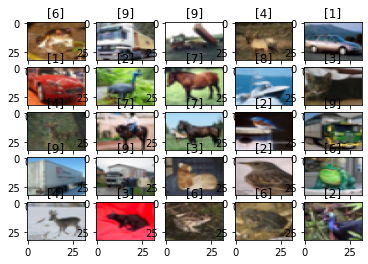

In [ ]:
# visualize data by plotting images and their labels
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        ax[i][j].set_title(y_train[k])
        k += 1
 
plt.show()

As we note, labels are integers from 0 to 9 representing the 10 different classes. 
To make it easier, we will implement a method that returns the label name from its corresponding number. 

In [ ]:
def get_label_name(label_number):
    names = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
    return names[label_number]


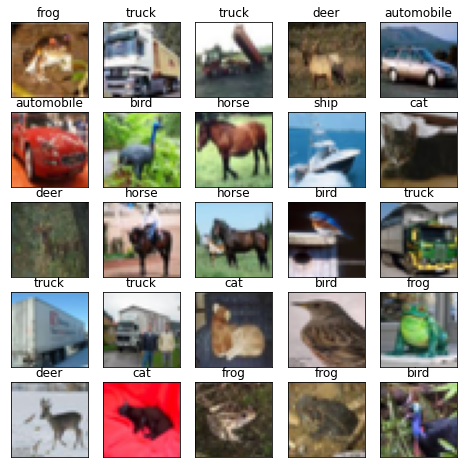

In [ ]:
# visualize data by plotting images and their labels
fig, ax = plt.subplots(5, 5, figsize=(8,8))
k = 0
  
for i in range(5):
  for j in range(5):
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].imshow(x_train[k], aspect='auto')
    ax[i][j].set_title(get_label_name(int(y_train[k])))
    k += 1
  
plt.show()



## Normalization
* A normalization function takes an image data, x, and returns it as a normalized Numpy array. 
* The values in the original data is transformed to the range [0,1] without change the shape of the array. 
* The need for normalization depends on the activation function.
* To normalize an input, we need its **mean and standard deviation**.

In [ ]:
def normalize(x_train):
  x_train_mean = np.mean(x_train, axis=0)
  x_train_std = np.std(x_train, axis=0)
  x_train_normalized = (x_train - x_train_mean) / x_train_std

  return x_train_normalized

In [ ]:
x_train_normalized = normalize(x_train)
print(x_train_normalized.shape)

(50000, 32, 32, 3)


## Greyscaling
Greyscaling is a process by which an image is converted from a full color to shades of grey. This is done because it simplifies the image, acting almost as noise reduction and decreasing processing time as there’s less information in the images.

This is done by taking the weighted mean of the RGB value of original image using this formula **Y' = 0.299 R + 0.587 G + 0.114 B**.

Or it can simply be done using the **cv2 module**.

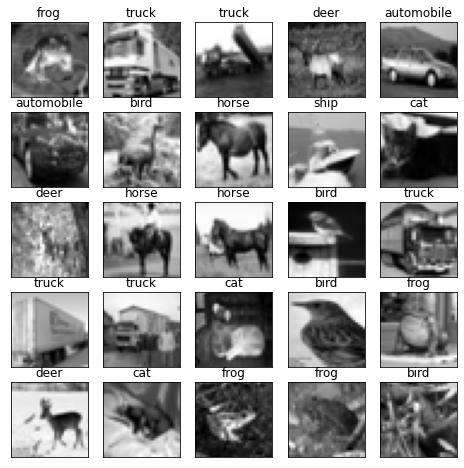

In [ ]:
import cv2

x_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])

# visualize data after grayscaling
fig, ax = plt.subplots(5, 5, figsize=(8,8))
k = 0
  
for i in range(5):
  for j in range(5):
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].imshow(x_train_gray[k], aspect='auto', cmap='gray')
    ax[i][j].set_title(get_label_name(int(y_train[k])))
    k += 1

plt.show()

#2 - Text Dataset
We will be using a dataset containing reviews of various products manufactured by Amazon, like Kindle, Fire TV, Echo, etc. 

You can download the dataset [here](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products).

The dataset has about 34,000+ rows, each containing review text, username, product name, rating, and other information for each product. 


## Exploring the dataset
The first step will be to import the dataset and explore its shape.

In [3]:
# Importing dataset
df = pd.read_csv('reviews.csv') 
print("Shape of data ", df.shape)

FileNotFoundError: ignored

Now, let's take a look at the features of the dataset and their types.

In [ ]:
#viewing the columns in the dataset and their types
for i in range(len(df.columns)):
  print("\nName: ", df.columns[i], "| Type: ", df.dtypes[i])

You may keep all the features, but if they won't be used, then it's better to drop them and keep only the features you need. 

Assume, we will only need information such as product name, review text, user recommendation, and the number of people that found a review helpful. We will reduce our dataset to keep only these features and drop the rest.


In [ ]:
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("New shape of data:",df.shape)
df.head(5)

## Null values
Most of the times, the dataset contains null values for some features. We need to decide how to deal with null values.

In [ ]:
#check the count of null values for each column
df.isnull().sum()

Handling these null values can be done in different ways:
* You may drop the rows having these null values. 
* You may leave them as without change, but make sure to handle the null values in your further code.
* You may replace them with different values.

For now, we will be dropping the rows having null values and keep only the reviews with complete features.

In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())
print("\nShape:", df.shape)

## Data Filtering
Assume we need to work on products that have a pecific amount or reviews. So, we need to filter the dataset to contain only products which have for exmaple more than 500 reviews.

We will do that using lambda expressions.

In [ ]:
#keep only products with at least 500 reviews
df = df.groupby('name').filter(lambda x:len(x)>=500).reset_index(drop=True)

#The number of products after filtering
print('\nNumber of products: ',len(df['name'].unique()))

In [ ]:
#check the number of reviews for each unique product
for product in df['name'].unique():
  print(product, " : ", len(df[df['name']==product]), " reviews\n")

##Changing data types
You may need to change the type of a certain features for future usage.
For example, the type of the 'reviews.numHelpful' feature is float. We will change this to int. 

In [ ]:
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

for i in range(len(df.columns)):
  print("\nName: ", df.columns[i], "| Type: ", df.dtypes[i])


##Cleaning Text Data
Generally, text data contains a lot of noise either in the form of symbols or in the form of punctuations and stopwords.
It's necessary to clean this text to make it more understandable and to get better insights.

In our dataset, the 'name' and 'reviews.Text' features are in the textual form. 

First, let's have alook at the 'name' feature.

In [ ]:
df['name'].unique()

You can see that some names contain repeating names separated by three consecutive commas (,,,) or just have the three commas at the end.
So, we will consider the product name to be the text before the three commas and delete anything else.

In [ ]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])
df['name'].unique()

Now, let's have a look at the 'reviews.Text' feature.

In [ ]:
for review in df['reviews.text'][0:5]:
  print(review, "\n")

Here, you can see that we have some contractions like "I've", numbers like "1280" and punctuations like "...", "/" and "." present in the reviews. We’ll handle these by performing the below operations:

* Expand contractions
* Lowercase the reviews
* Remove digits and words containing digits
* Remove punctuations
* Remove extra spaces

###Expand Contractions
Contractions are the shortened versions of words like don’t for do not and how’ll for how will. We need to expand these contractions for a better analysis of the reviews.
We used a dictionary of common English contractions that will be mapped to their expanded forms.

In [ ]:
import re

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))


###Lowercase the reviews
Computers treat words like Goat and goat differently, even if they are the same. Therefore, we lowercase the words. 

In [ ]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())


###Remove digits and words with digits
We will remove numbers and words containing digits from the reviews, because they do not give much importance to the main words. 

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))


###Remove Punctuations
Punctuations are important for English grammar but not for text analysis. So, they will be removed. We will use string.punctuations function which contains all the punctuations, and we use regular expressions to search them in the text and remove them. 

In [ ]:
import string 
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


###Extra space removal
Finally, we remove any extra spaces present in the data. 

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

for review in df['reviews.text'][0:5]:
  print(review, "\n")

###Creating Document Term Matrix
A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are the reviews. It helps in analyzing the occurrence of words in different documents in a corpus.

To form the Documnet Term Matrix, we will do the following:
* Stopwords Removal
* Lemmatization
* Create Document Term Matrix

####Stopwords Removal:
Stopwords are the most common words of a language like 'I', 'this', 'is, etc. which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

####Lemmatization
Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.

We’ll use **SpaCy** for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [ ]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

After removing stopwords and lemmatizing our reviews. We will group them according to the products to form the Document Term Matrix

In [ ]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

In [ ]:

# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

##Word Clouds
To get better insights, you may need to look for the common words present in the reviews for each product. For this, we will use the document term matrix with word clouds for plotting these words. 

Word clouds are the visual representations of the frequency of different words present in a document. Word clouds can be generated using the wordcloud library.

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

#3 - Structured Dataset
Structured data is a type of data which has well-defined structure & order.
The greatest advantage in this kind of data is that it can be easily accessed and read by machine programs.

We will be using  historical stock prices from [Yahoo! Finance](https://finance.yahoo.com/). We will work on a **csv** file containing historical stock prices for Apple. You can download the csv file from [here](https://finance.yahoo.com/quote/AAPL/history?p=AAPL&guccounter=1&guce_referrer=aHR0cHM6Ly93d3cubGVhcm5weXRob253aXRocnVuZS5vcmcvc3RhcnQtcHl0aG9uLXdpdGgtcGFuZGFzLWZvci1maW5hbmNpYWwtYW5hbHlzaXMv&guce_referrer_sig=AQAAAM0bgU5Uhun1bSwpgCL1pFEdP5bNNR24PywwnPVQh_Wi_McASe9Aztve6byGRdf9iEKyXqxbqpfR8z43E5QGU17B4eAfPDfTWgzWYApQxTwek3-1KqQugmSVU69wVdeLzMUvvGJyfOwwPhqn4qdon90O8rlc4vg-iifobIPACQFA).



##Exploring the dataset
The first step to work with structured data is to know what fields it contain and their types. 

In [ ]:
stock_data = pd.read_csv("AAPL.csv", index_col=0, parse_dates=True)
stock_data.head()

Data size =  1771


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-03,109.660004,111.489998,108.730003,110.440002,109.734200,107624400
1,2020-11-04,114.139999,115.589996,112.349998,114.949997,114.215385,138235500
2,2020-11-05,117.949997,119.620003,116.870003,119.029999,118.269302,126387100
3,2020-11-06,118.320000,119.199997,116.129997,118.690002,118.134956,114457900
4,2020-11-09,120.500000,121.989998,116.050003,116.320000,115.776031,154515300


**Note that:** 

**index_col=0:** this sets the first column of the CSV file to be the index. In this case, it is the Date column.

**parse_dates=True** this ensures that dates in the CSV file are interpreted as dates. This is important if you want to take advantage of the index being a time.

In [ ]:
print("Data size = ", stock_data.size)
print("\nData types:\n", stock_data.dtypes)

Data size =  1771

Data types:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


###Creating new columns
We can create new column to save some derived data. For example, we are making a new column called **Daily chg** which represents the change in the stock price in that day. 

In [ ]:
stock_data['Daily chg'] = stock_data['Close'] - stock_data['Open']
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily chg
0,2020-11-03,109.660004,111.489998,108.730003,110.440002,109.734200,107624400,0.779998
1,2020-11-04,114.139999,115.589996,112.349998,114.949997,114.215385,138235500,0.809998
2,2020-11-05,117.949997,119.620003,116.870003,119.029999,118.269302,126387100,1.080002
3,2020-11-06,118.320000,119.199997,116.129997,118.690002,118.134956,114457900,0.370002
4,2020-11-09,120.500000,121.989998,116.050003,116.320000,115.776031,154515300,-4.180000


###Finding min and max
You can find the min/max value in a specific column or find the index of that value.

In [ ]:
print("The min Close value: ", stock_data['Close'].min())
print("The index corresponding to that min value: ", stock_data['Close'].argmin())
print("The data corresponding to that min value: \n")
print(stock_data.iloc[stock_data['Close'].argmin()])

print("\nThe max Close value: ", stock_data['Close'].max())
print("The index corresponding to that max value: ")
print(stock_data.iloc[stock_data['Close'].argmax()])


The min Close value:  110.440002
The index corresponding to that min value:  0
The data corresponding to that min value: 

Date         2020-11-03
Open             109.66
High             111.49
Low              108.73
Close            110.44
Adj Close       109.734
Volume        107624400
Daily chg      0.779998
Name: 0, dtype: object

The max Close value:  156.690002
The index corresponding to that max value: 
Date         2021-09-07
Open             154.97
High             157.26
Low              154.39
Close            156.69
Adj Close        156.69
Volume         82278300
Daily chg          1.72
Name: 211, dtype: object


###Mean and Standard deviation
You can find the mean and standard deviation of a specific column.

In [ ]:
print("Mean Close price", stock_data['Close'].mean())
print("Std of Close price", stock_data['Close'].std())

Mean Close price 134.18770746640322
Std of Close price 10.843533249637147


###Drop data 
If you are not using some of the existing data, it's always better to remove them. 

**labels:** sets the labels of the columns we want to remove.

**axis=1** sets the axis of the labels. Default is 0, which will look for the labels on the index. While axis=1 is the column names.

**inplace=True** says it should actually remove the columns on the DataFrame we work on. Otherwise it will return a new DataFrame without the columns.

In [ ]:
stock_data.drop(labels=['Adj Close', 'Volume'], axis=1, inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Daily chg
0,2020-11-03,109.660004,111.489998,108.730003,110.440002,0.779998
1,2020-11-04,114.139999,115.589996,112.349998,114.949997,0.809998
2,2020-11-05,117.949997,119.620003,116.870003,119.029999,1.080002
3,2020-11-06,118.320000,119.199997,116.129997,118.690002,0.370002
4,2020-11-09,120.500000,121.989998,116.050003,116.320000,-4.180000


###Checking for Null values
Datasets aren't perfect. They may contain null values for any reasons. 
You must know in advance if you there exist any missing values in your dataset or not so you can deal with it. 

Dealing with null values can be one of these ways:


1.   Drop rows having null values
2.   Filling missing values using fillna(), replace() and interpolate()



In [ ]:
#check if there is null value 
stock_data.isnull().sum()

#drop rows that have at least one null value
stock_data.dropna()
#drop rows if all data are missing
stock_data.dropna(how = 'all')

# filling missing value using a specific value
stock_data.fillna(0)
# filling a missing value with previous ones  
stock_data.fillna(method ='pad')
# filling a missing value with next ones  
stock_data.fillna(method ='bfill')

,Date,Open,High,Low,Close,Daily chg
0,2020-11-03,109.660004,111.489998,108.730003,110.440002,0.779998
1,2020-11-04,114.139999,115.589996,112.349998,114.949997,0.809998
2,2020-11-05,117.949997,119.620003,116.870003,119.029999,1.080002
3,2020-11-06,118.320000,119.199997,116.129997,118.690002,0.370002
4,2020-11-09,120.500000,121.989998,116.050003,116.320000,-4.180000
...,...,...,...,...,...,...
248,2021-10-28,149.820007,153.169998,149.720001,152.570007,2.750000
249,2021-10-29,147.220001,149.940002,146.410004,149.800003,2.580002
250,2021-11-01,148.990005,149.699997,147.800003,148.960007,-0.029998
251,2021-11-02,148.660004,151.570007,148.649994,150.020004,1.360000


###Showing trends in your data
You can always use plots to explore trends in your data before you start training them.


Text(0.5, 1.0, 'Apple Closing stock price')

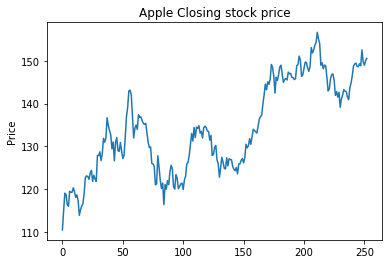

In [ ]:
fig, ax = plt.subplots()
stock_data['Close'].plot(ax=ax)
ax.set_ylabel("Price")
ax.set_title("Apple Closing stock price")